In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [22]:
import warnings
warnings.filterwarnings("ignore")
titanic = sns.load_dataset("titanic")

DATA PREPROCESSING


In [23]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic.dropna( subset=["age","embarked"],inplace=True )
titanic =pd .get_dummies(titanic,columns=["sex","embarked","class","who","deck"],drop_first=True)

In [25]:
X = titanic.drop( ["survived","embark_town","alone","adult_male","alive"],axis=1)
y = titanic["survived"]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2) 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaled_X_train  = scaler.fit_transform(X_train) 
scaled_X_test  = scaler.fit(X_test) 

In [ ]:
from tensorflow import keras
from keras import layers
from keras import models
model = models.Sequential([
    layers.Dense(10,activation="relu",input_shape = (scaled_X_train.shape[1],)),
    layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


model.fit(scaled_X_train,y_train,epochs=15,verbose=1)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6097 - loss: 0.7638
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6538 - loss: 0.7351
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6786 - loss: 0.7152
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6652 - loss: 0.6835
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7117 - loss: 0.6242
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7178 - loss: 0.6103
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7394 - loss: 0.5573
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7428 - loss: 0.5459
Epoch 9/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7322 - loss: 0.5625
Epoch 10/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7529 - loss: 0.5111
Epoch 11/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7357 - loss: 0.5461
Epoch 12/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7638 - 

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6794 - loss: 0.6253 - val_accuracy: 0.7719 - val_loss: 0.6086
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7036 - loss: 0.6143 - val_accuracy: 0.7632 - val_loss: 0.5779
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7371 - loss: 0.5784 - val_accuracy: 0.7456 - val_loss: 0.5523
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7490 - loss: 0.5649 - val_accuracy: 0.7544 - val_loss: 0.5341
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7820 - loss: 0.5144 - val_accuracy: 0.7719 - val_loss: 0.5190
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7788 - loss: 0.5554 - val_accuracy: 0.7719 - val_loss: 0.5057
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7945 - loss: 0.4990 - val_accuracy: 0.7807 - val_loss: 0.4955
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7876 - loss: 0.4857 - val_accuracy: 0.7719 - v

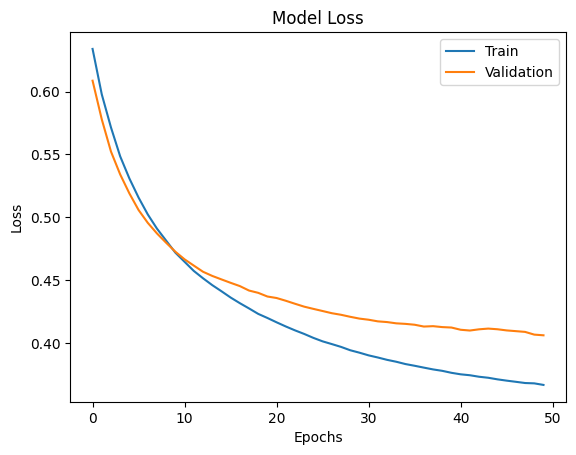

In [39]:
model = models.Sequential([
    layers.Dense(10,activation="relu",input_shape = (scaled_X_train.shape[1],)),
    layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(scaled_X_train,y_train,validation_split=0.2,epochs=50)



import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc= "upper right")
plt.show()


In [ ]:

# input_layer = tf.keras.layers.Dense(10,activation = "relu",input_shape = (X_train.shape[1],))
# output_layer = tf.keras.layers.Dense(1,activation="sigmoid") 
# model = tf.keras.models.Sequential([input_layer,output_layer])
# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# model.fit(X_train,y_train,epochs = 20, batch)